In [1]:
import os, shutil

In [1]:
!pwd

/home/tuffy/Documents/CholletDL


In [2]:
original_dataset_dir = '/home/tuffy/Downloads/train'
base_dir = '/home/tuffy/Documents/CholletDL/cats_and_dogs_small'
train_dir= os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir= os.path.join(train_dir,'cats')
train_dogs_dir= os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')


以下のプログラム`split_dogcat_dataset.py`を実行
```python
original_dataset_dir = '/home/tuffy/Downloads/train'
base_dir = '/home/tuffy/Downloads/cats_and_dogs_small'
os.mkdir(base_dir)
train_dir= os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir= os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir= os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
```

In [7]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [4]:
model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics=['acc'])

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
# 当初batch_size20では動かず(ResourceExhaustedError)、
# batch_size5まで減らすことで動くようになった。
# 他のノートブックを同時に開いていたことが影響していた。
# 閉じるとメモリ消費が一気に減り、batch_size20でも動くようになった。
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size = (150,150),
    batch_size = 20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


the generator yields these batches indefinitely: it loops endlessly over the images in the target folder.

In [13]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30, 
    validation_data=validation_generator,
    validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 43s 434ms/step - loss: 0.6912 - acc: 0.5385 - val_loss: 0.6749 - val_acc: 0.6100
Epoch 2/30
100/100 [==============================] - 42s 416ms/step - loss: 0.6668 - acc: 0.6070 - val_loss: 0.6549 - val_acc: 0.6140
Epoch 3/30
100/100 [==============================] - 42s 416ms/step - loss: 0.6225 - acc: 0.6610 - val_loss: 0.6283 - val_acc: 0.6460
Epoch 4/30
100/100 [==============================] - 41s 412ms/step - loss: 0.5795 - acc: 0.6935 - val_loss: 0.5980 - val_acc: 0.6770
Epoch 5/30
100/100 [==============================] - 41s 412ms/step - loss: 0.5483 - acc: 0.7175 - val_loss: 0.5934 - val_acc: 0.6790
Epoch 6/30
100/100 [==============================] - 41s 412ms/step - loss: 0.5110 - acc: 0.7660 - val_loss: 0.5632 - val_acc: 0.7060
Epoch 7/30
100/100 [==============================] - 41s 415ms/step - loss: 0.4877 - acc: 0.7730 - val_loss: 0.5489 - val_acc: 0.7330
Epoch 8/30
100/100 [==============================] - 4

In [7]:
model.save('cats_and_dogs_small_1.h5')

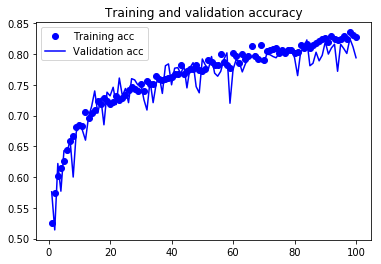

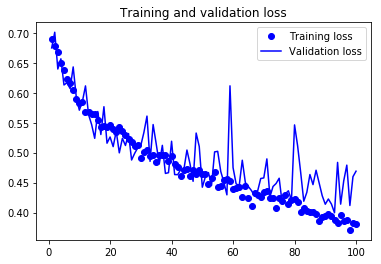

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc,'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss,'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

overfitting!

# Data augmentation

In [5]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range =0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

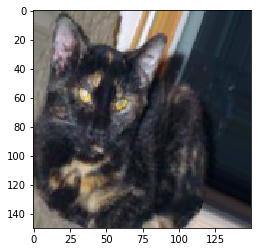

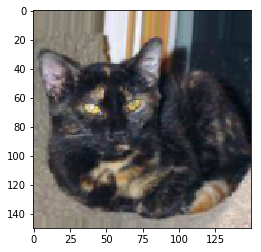

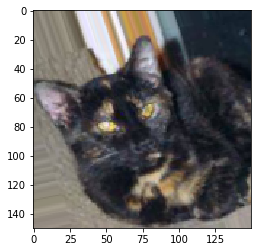

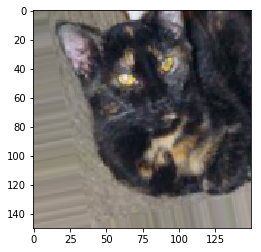

In [16]:
from tensorflow.keras.preprocessing import image

fnames= [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i +=1
    if i% 4 == 0:
        break
plt.show()

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [7]:
model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics=['acc'])

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range= 0.2,
                                  shear_range=0.2,
                                  zoom_range =0.2,
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150), 
                                                    batch_size = 20,
                                                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                    target_size = (150,150), 
                                                    batch_size = 20,
                                                    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs=100,
                             validation_data = validation_generator,
                             validation_steps = 50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 [==============================] - 58s 575ms/step - loss: 0.6941 - acc: 0.5115 - val_loss: 0.6840 - val_acc: 0.5770
Epoch 2/100
100/100 [==============================] - 54s 543ms/step - loss: 0.6874 - acc: 0.5400 - val_loss: 0.6682 - val_acc: 0.6100
Epoch 3/100
100/100 [==============================] - 55s 549ms/step - loss: 0.6752 - acc: 0.5785 - val_loss: 0.6502 - val_acc: 0.6180
Epoch 4/100
100/100 [==============================] - 53s 532ms/step - loss: 0.6601 - acc: 0.6020 - val_loss: 0.6457 - val_acc: 0.6140
Epoch 5/100
100/100 [==============================] - 54s 543ms/step - loss: 0.6448 - acc: 0.6215 - val_loss: 0.6274 - val_acc: 0.6330
Epoch 6/100
100/100 [==============================] - 54s 540ms/step - loss: 0.6257 - acc: 0.6550 - val_loss: 0.6243 - val_acc: 0.6300
Epoch 7/100
100/100 [==============================] - 55s 547ms/step - loss: 0.6064 - acc: 0.6750 - val_los

In [10]:
model.save('cats_and_dogs_small_2.h5')